In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file = r'../data/scalability_test/2021_07_01-01_27_00_AM/result.csv'
data = pd.read_csv(file, dtype = {'size' : 'int', 'num_dep_indep' : 'int', 
                                  'number_splitby' : 'int', 'trial' : 'int'})

In [3]:
data

,size,num_dep_indep,number_splitby,cluster,trial,time
0,1000,4,4,2,1,0.012822
1,1000,4,4,2,2,0.010422
2,1000,4,4,2,3,0.011563
3,1000,4,4,2,4,0.010744
4,1000,4,4,2,5,0.010521
...,...,...,...,...,...,...
2395,100000,32,32,32,6,3.070362
2396,100000,32,32,32,7,2.385688
2397,100000,32,32,32,8,1.715906
2398,100000,32,32,32,9,2.004553


In [4]:
data["subgroup"] = data["number_splitby"] * data["cluster"]
data['trial'] = data['trial'].apply(str)

In [5]:
data

,size,num_dep_indep,number_splitby,cluster,trial,time,subgroup
0,1000,4,4,2,1,0.012822,8
1,1000,4,4,2,2,0.010422,8
2,1000,4,4,2,3,0.011563,8
3,1000,4,4,2,4,0.010744,8
4,1000,4,4,2,5,0.010521,8
...,...,...,...,...,...,...,...
2395,100000,32,32,32,6,3.070362,1024
2396,100000,32,32,32,7,2.385688,1024
2397,100000,32,32,32,8,1.715906,1024
2398,100000,32,32,32,9,2.004553,1024


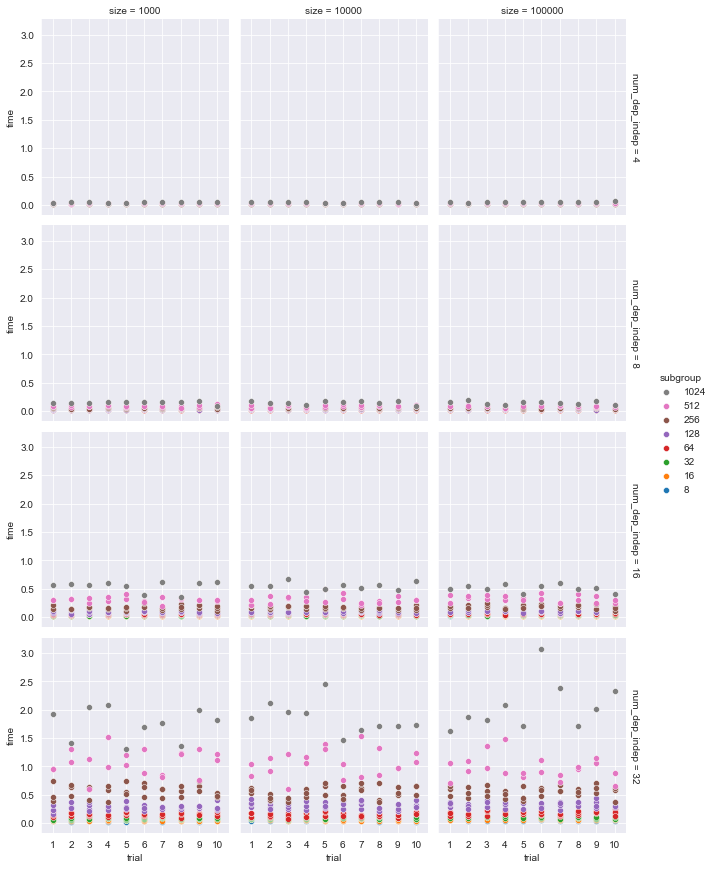

In [6]:
sns.set_style("darkgrid")
g = sns.FacetGrid(data, col="size", row="num_dep_indep", margin_titles=True, hue="subgroup")
g.map_dataframe(sns.scatterplot, x="trial", y="time")
g.set_axis_labels("trial", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

In [7]:
n1000_d4_df = data[(data['size']==1000) & (data['num_dep_indep']==4)]
n1000_d4_df

,size,num_dep_indep,number_splitby,cluster,trial,time,subgroup
0,1000,4,4,2,1,0.012822,8
1,1000,4,4,2,2,0.010422,8
2,1000,4,4,2,3,0.011563,8
3,1000,4,4,2,4,0.010744,8
4,1000,4,4,2,5,0.010521,8
...,...,...,...,...,...,...,...
675,1000,4,32,32,6,0.045086,1024
676,1000,4,32,32,7,0.045002,1024
677,1000,4,32,32,8,0.046539,1024
678,1000,4,32,32,9,0.045686,1024


# Aggregate on timings_mean by trials

In [8]:
grouped_df = data.groupby(['size', 'num_dep_indep', 'number_splitby', 'cluster', 'subgroup']).agg({'time': ['mean']})
grouped_df.columns = ['time_mean']
grouped_df = grouped_df.reset_index()
print(grouped_df.head())

   size  num_dep_indep  number_splitby  cluster  subgroup  time_mean
0  1000              4               4        2         8   0.011094
1  1000              4               4        4        16   0.008368
2  1000              4               4        8        32   0.009343
3  1000              4               4       16        64   0.010774
4  1000              4               4       32       128   0.013158


## With Standard devidation

In [9]:
grouped_std_df = data.groupby(['size', 'num_dep_indep', 'number_splitby', 'cluster', 'subgroup']).agg({'time': ['mean','std']})
grouped_std_df.columns = ['time_mean', 'time_std']
grouped_std_df = grouped_std_df.reset_index()
grouped_std_df

,size,num_dep_indep,number_splitby,cluster,subgroup,time_mean,time_std
0,1000,4,4,2,8,0.011094,0.001015
1,1000,4,4,4,16,0.008368,0.000102
2,1000,4,4,8,32,0.009343,0.000260
3,1000,4,4,16,64,0.010774,0.000542
4,1000,4,4,32,128,0.013158,0.001032
...,...,...,...,...,...,...,...
235,100000,32,32,2,64,0.164128,0.028377
236,100000,32,32,4,128,0.302980,0.044479
237,100000,32,32,8,256,0.500125,0.089691
238,100000,32,32,16,512,0.897168,0.126921


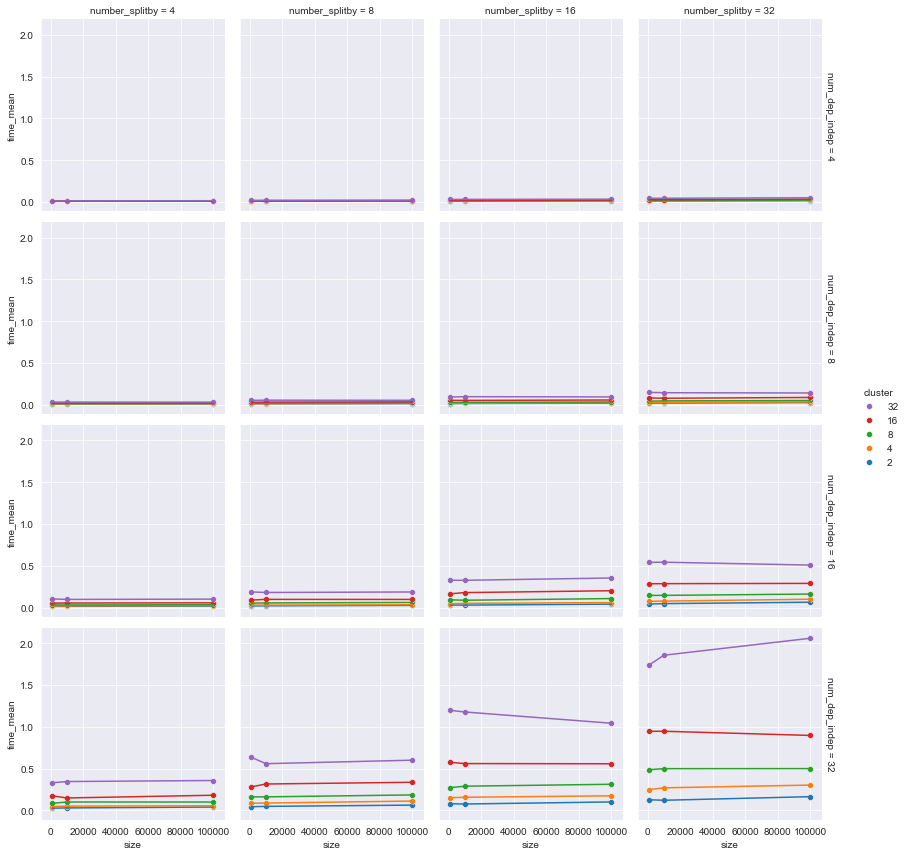

In [10]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(grouped_df, col="number_splitby", row="num_dep_indep", margin_titles=True, hue="cluster")
g.map_dataframe(sns.scatterplot, x="size", y="time_mean")
g.map(plt.plot, "size", "time_mean")
g.set_axis_labels("size", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

In [11]:
data.head()

,size,num_dep_indep,number_splitby,cluster,trial,time,subgroup
0,1000,4,4,2,1,0.012822,8
1,1000,4,4,2,2,0.010422,8
2,1000,4,4,2,3,0.011563,8
3,1000,4,4,2,4,0.010744,8
4,1000,4,4,2,5,0.010521,8


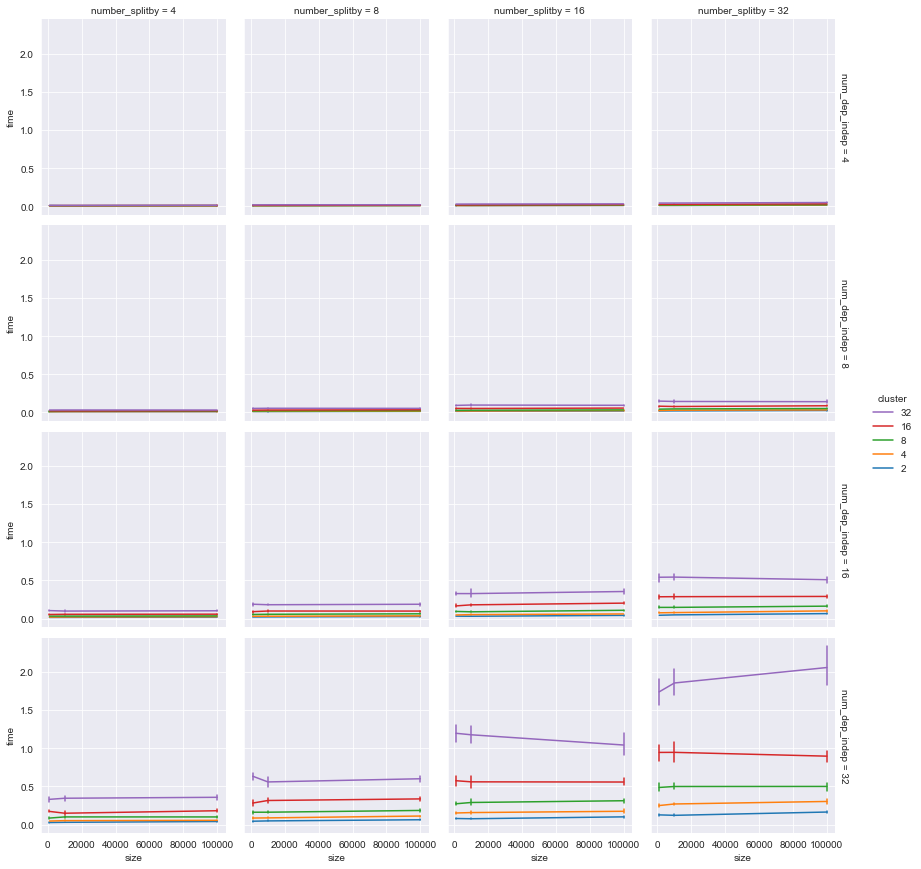

In [12]:
g = sns.FacetGrid(data, col="number_splitby", row="num_dep_indep", margin_titles=True, hue="cluster")
g.map_dataframe(sns.lineplot, x="size", y="time", err_style="bars")
g.set_axis_labels("size", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

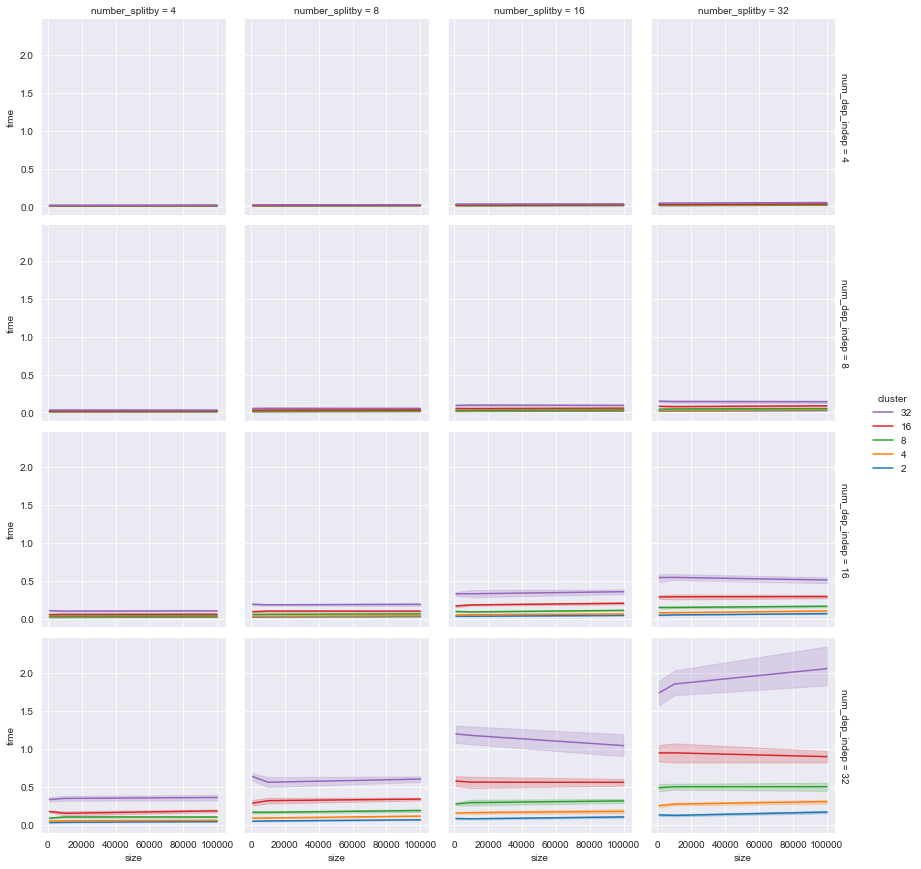

In [13]:
g = sns.FacetGrid(data, col="number_splitby", row="num_dep_indep", margin_titles=True, hue="cluster")
g.map_dataframe(sns.lineplot, x="size", y="time")
g.set_axis_labels("size", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

# Data size in different conditions

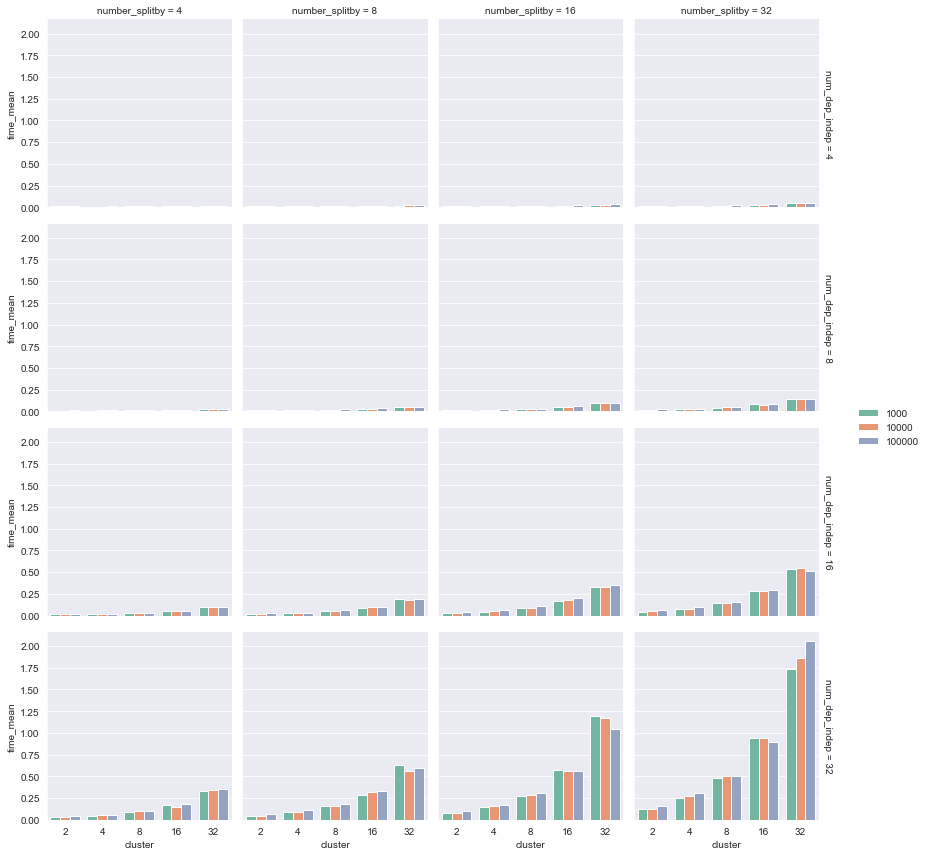

In [14]:
g = sns.FacetGrid(grouped_df, col="number_splitby", row="num_dep_indep", margin_titles=True)

g = g.map(sns.barplot, 'cluster', 'time_mean', 'size', 
          hue_order=np.unique(grouped_df["size"]),
          order=[2,4,8,16,32], 
          palette=sns.color_palette("Set2"))

#g.set_axis_labels("size", "time_mean")
g.add_legend()

# num_dep_indep

## Scatterplot on grouped dataframe

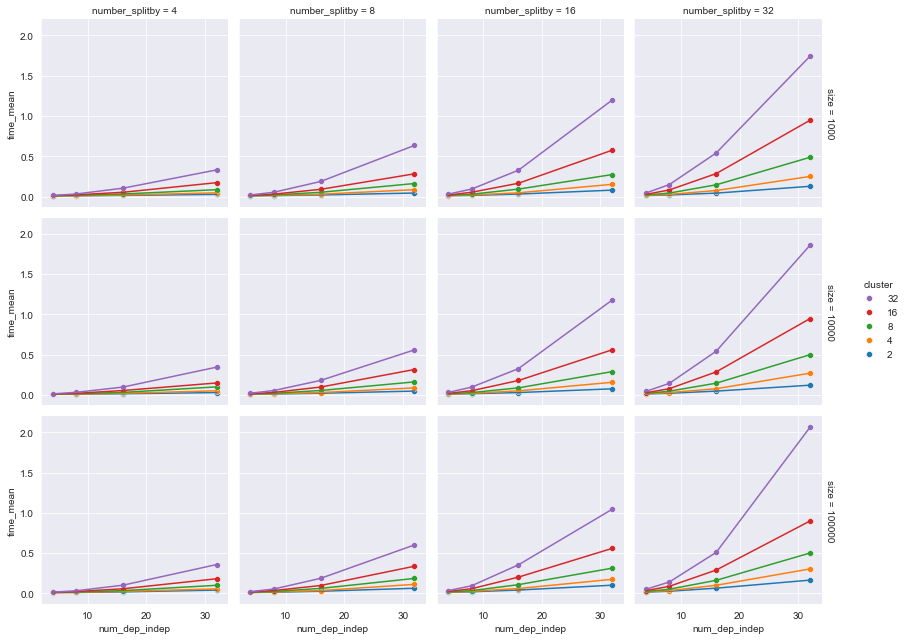

In [15]:
g = sns.FacetGrid(grouped_df, col="number_splitby", row="size", margin_titles=True, hue="cluster")
g.map_dataframe(sns.scatterplot, x="num_dep_indep", y="time_mean")
g.map(plt.plot, "num_dep_indep", "time_mean")
g.set_axis_labels("num_dep_indep", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

In [16]:
n10000_s16_df = grouped_df[(grouped_df['size']==10000) & (grouped_df['number_splitby']==16)
                           & (grouped_df['cluster']==32)]
n10000_s16_df

,size,num_dep_indep,number_splitby,cluster,subgroup,time_mean
94,10000,4,16,32,512,0.031152
114,10000,8,16,32,512,0.097059
134,10000,16,16,32,512,0.326691
154,10000,32,16,32,512,1.177560


## Line chart with error bar on data

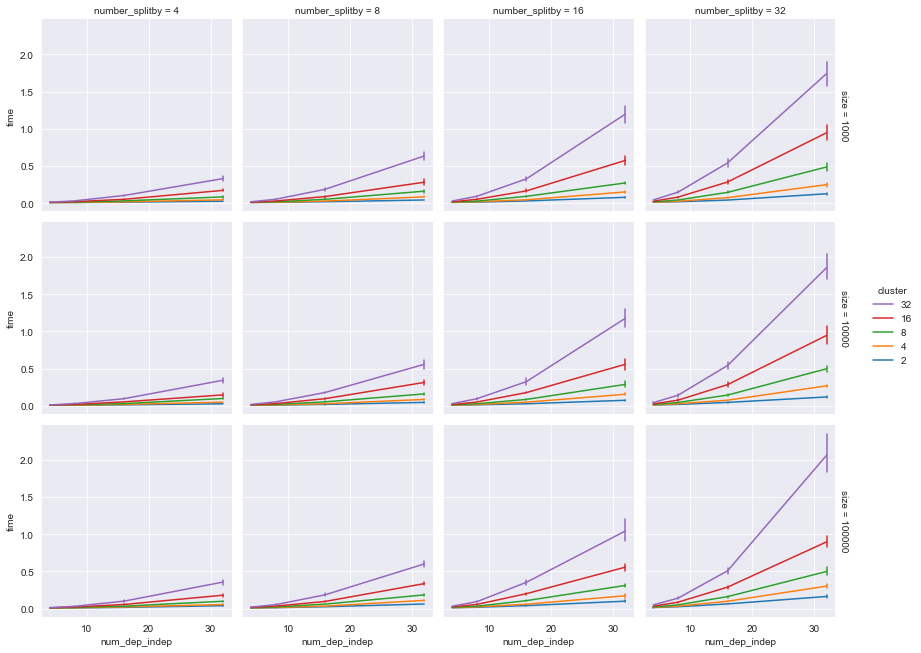

In [17]:
g = sns.FacetGrid(data, col="number_splitby", row="size", margin_titles=True, hue="cluster")
g.map_dataframe(sns.lineplot, x="num_dep_indep", y="time", err_style="bars")
g.set_axis_labels("num_dep_indep", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

# number_splitby

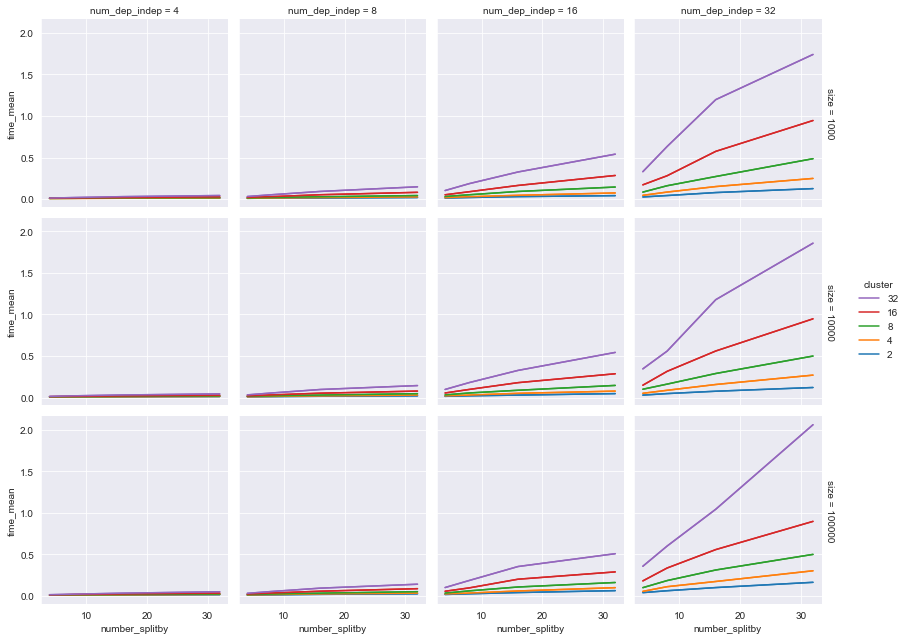

In [18]:
g = sns.FacetGrid(grouped_df, col="num_dep_indep", row="size", margin_titles=True, hue="cluster")
g.map_dataframe(sns.lineplot, x="number_splitby", y="time_mean")
g.map(plt.plot, "number_splitby", "time_mean")
g.set_axis_labels("number_splitby", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

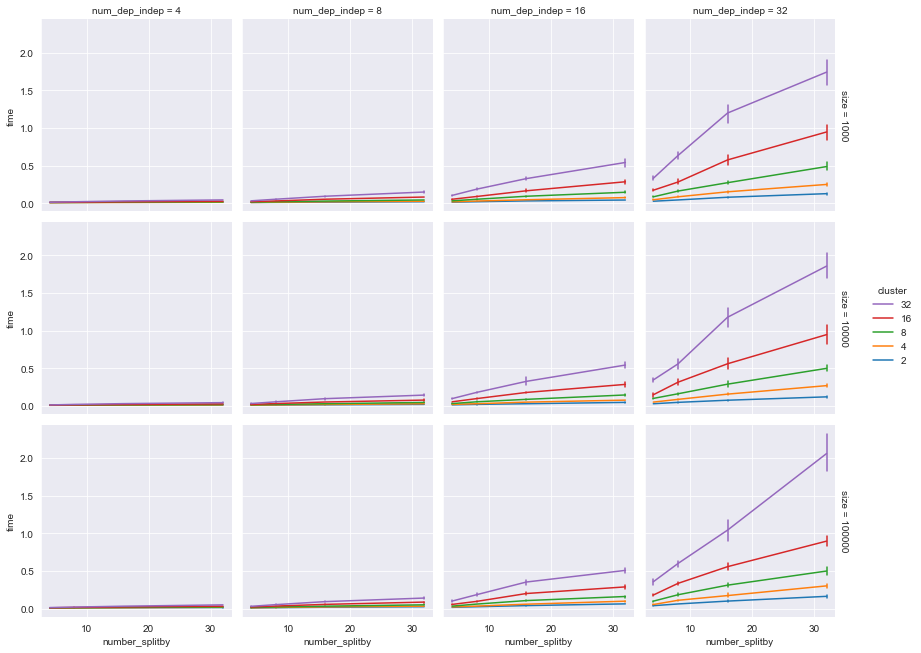

In [19]:
g = sns.FacetGrid(data, col="num_dep_indep", row="size", margin_titles=True, hue="cluster")
g.map_dataframe(sns.lineplot, x="number_splitby", y="time", err_style="bars")
g.set_axis_labels("number_splitby", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

# Hypothesis: if controling total subgroups, then neither number_splitby nor cluster number matter

## Scatterplot for subgroup 32, 64, 128

108


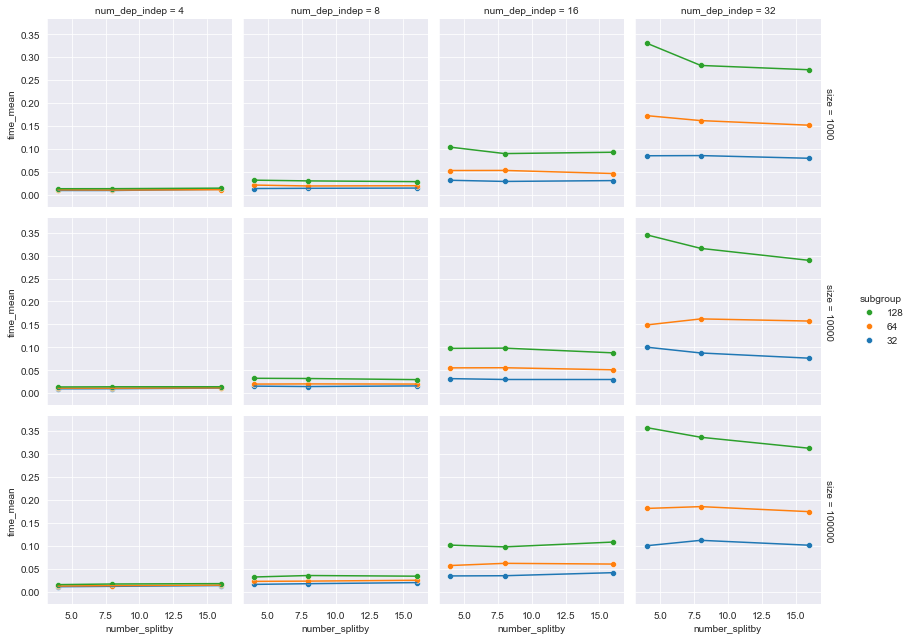

In [32]:
subgroup_s_4_8_16 = grouped_df[grouped_df['number_splitby'].isin([4, 8, 16])]
subgroup_32_64_128 = subgroup_s_4_8_16[subgroup_s_4_8_16['subgroup'].isin([32, 64, 128])]
print(len(subgroup_32_64_128))

g = sns.FacetGrid(subgroup_32_64_128, col="num_dep_indep", row="size", margin_titles=True, hue="subgroup")
g.map_dataframe(sns.scatterplot, x="number_splitby", y="time_mean")
g.map(plt.plot, "number_splitby", "time_mean")
g.set_axis_labels("number_splitby", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

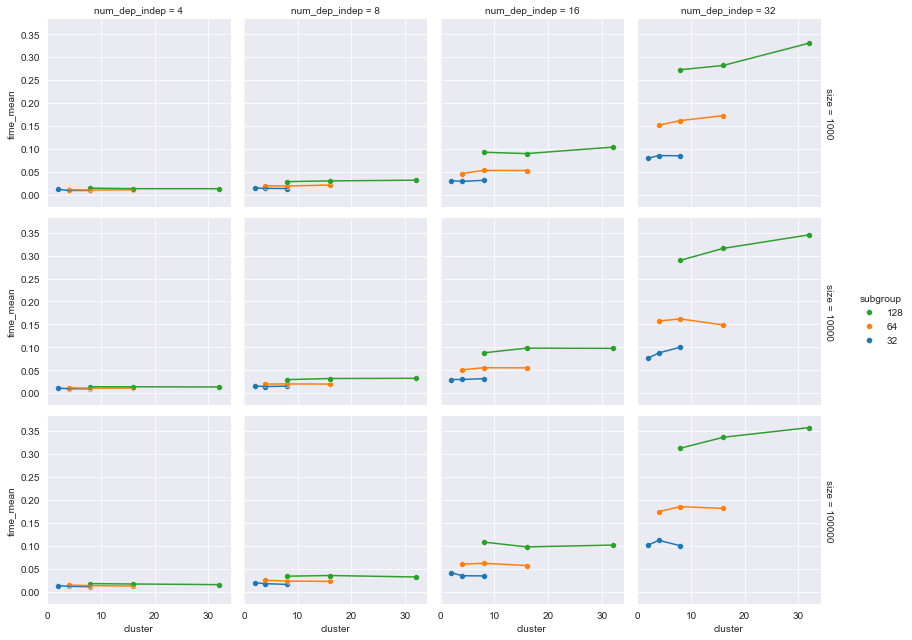

In [33]:
#subgroup_32_64_128 = grouped_df[grouped_df['subgroup'].isin([32, 64, 128])]
#print(len(subgroup_32_64_128))

g = sns.FacetGrid(subgroup_32_64_128, col="num_dep_indep", row="size", margin_titles=True, hue="subgroup")
g.map_dataframe(sns.scatterplot, x="cluster", y="time_mean")
g.map(plt.plot, "cluster", "time_mean")
g.set_axis_labels("cluster", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

## Line chart for subgroup 32, 64, 128 with error bar

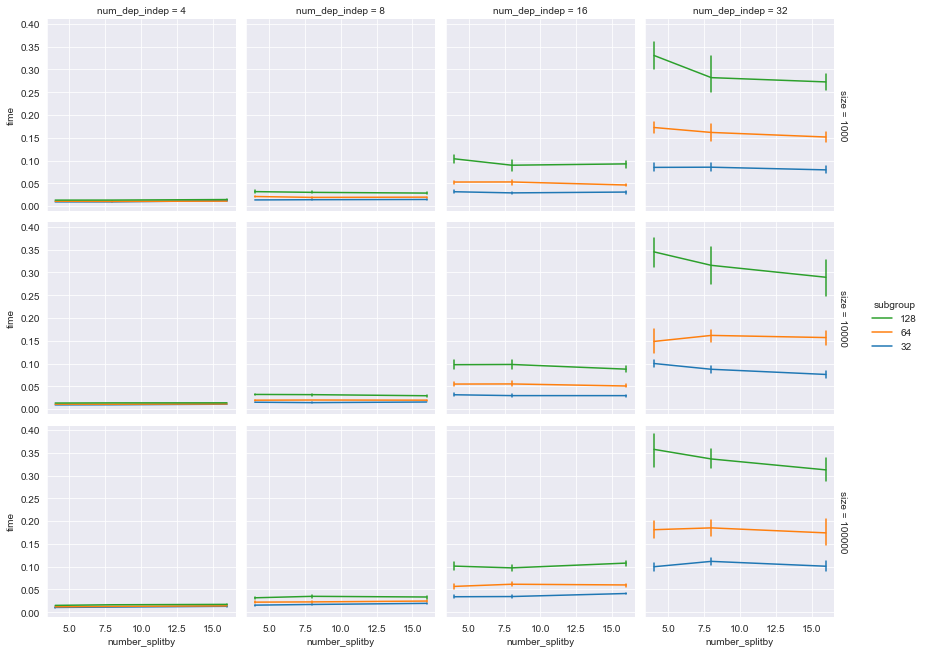

In [34]:
data_s_4_8_16 = data[data['number_splitby'].isin([4, 8, 16])]
subgroup_32_64_128_data = data_s_4_8_16[data_s_4_8_16['subgroup'].isin([32, 64, 128])]
#subgroup_32_64_128_data = data[data['subgroup'].isin([32, 64, 128])]

g = sns.FacetGrid(subgroup_32_64_128_data, col="num_dep_indep", row="size", margin_titles=True, hue="subgroup")
g.map_dataframe(sns.lineplot, x="number_splitby", y="time", err_style="bars")
g.set_axis_labels("number_splitby", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

In [35]:
len(subgroup_32_64_128_data)

1080

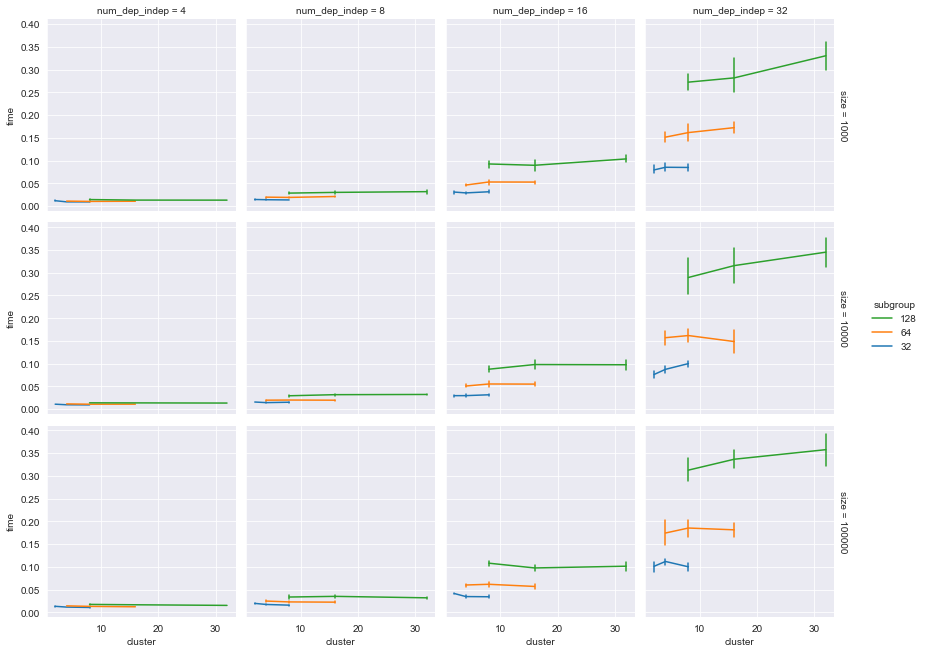

In [36]:
#subgroup_32_64_128_data = data[data['subgroup'].isin([32, 64, 128])]

g = sns.FacetGrid(subgroup_32_64_128_data, col="num_dep_indep", row="size", margin_titles=True, hue="subgroup")
g.map_dataframe(sns.lineplot, x="cluster", y="time", err_style="bars")
g.set_axis_labels("cluster", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

# Hypothesis: total subgroups matters

## Scatterplot on grouped dataframe

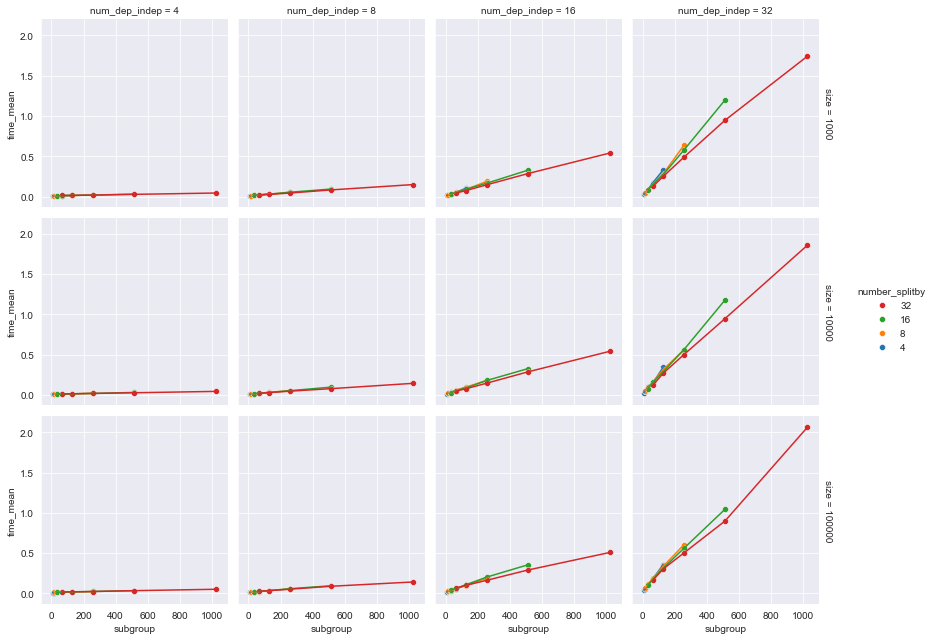

In [37]:
g = sns.FacetGrid(grouped_df, col="num_dep_indep", row="size", margin_titles=True, hue="number_splitby")
g.map_dataframe(sns.scatterplot, x="subgroup", y="time_mean")
g.map(plt.plot, "subgroup", "time_mean")
g.set_axis_labels("subgroup", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

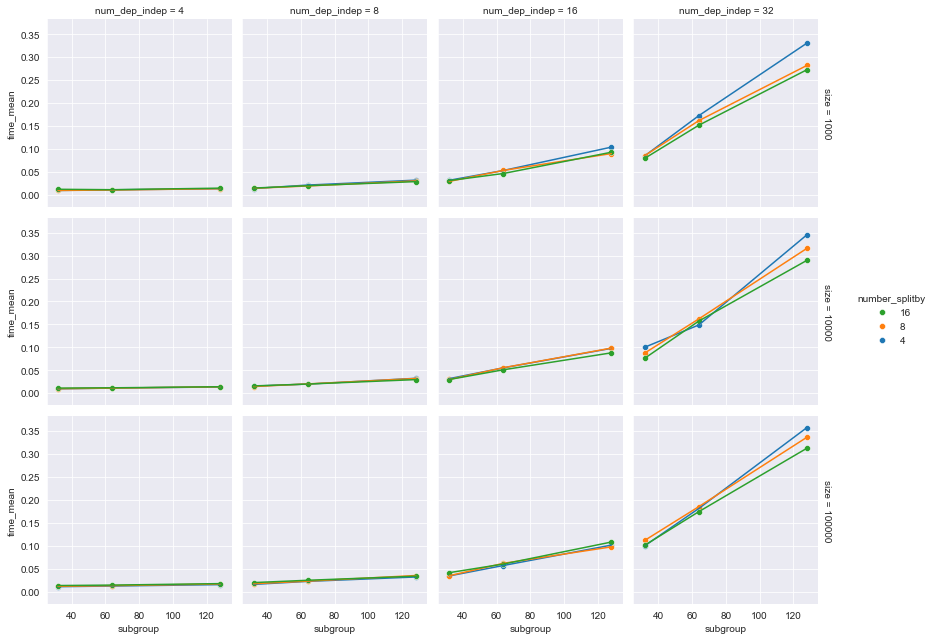

In [38]:
g = sns.FacetGrid(subgroup_32_64_128, col="num_dep_indep", row="size", margin_titles=True, hue="number_splitby")
g.map_dataframe(sns.scatterplot, x="subgroup", y="time_mean")
g.map(plt.plot, "subgroup", "time_mean")
g.set_axis_labels("subgroup", "time_mean")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

## Line chart with error bar on data

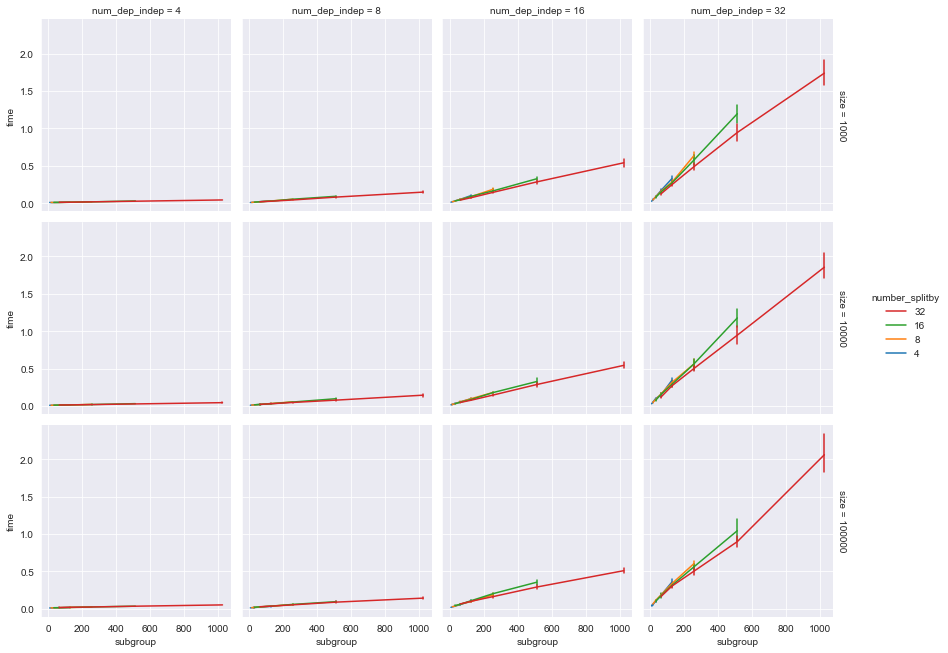

In [39]:
g = sns.FacetGrid(data, col="num_dep_indep", row="size", margin_titles=True, hue="number_splitby")
g.map_dataframe(sns.lineplot, x="subgroup", y="time", err_style="bars")
g.set_axis_labels("subgroup", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

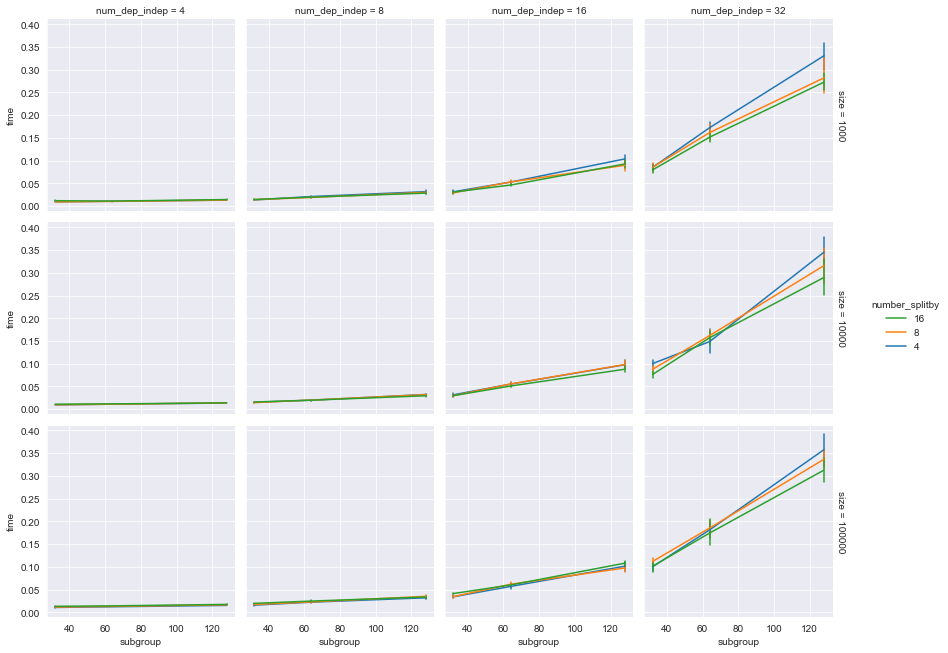

In [40]:
#subgroup_32_64_128_data = data[data['subgroup'].isin([32, 64, 128])]
g = sns.FacetGrid(subgroup_32_64_128_data, col="num_dep_indep", row="size", margin_titles=True, hue="number_splitby")
g.map_dataframe(sns.lineplot, x="subgroup", y="time", err_style="bars")
g.set_axis_labels("subgroup", "time")
#g.add_legend()
g.add_legend(label_order = sorted(g._legend_data.keys(), key = int, reverse=True))

# Generate pivot table

In [41]:
pivot_table = pd.pivot_table(data, values= 'time', index=['size', 'num_dep_indep'], columns=['number_splitby', 'cluster'])
pivot_table

number_splitby              4                                           \
cluster                     2         4         8         16        32   
size   num_dep_indep                                                     
1000   4              0.011094  0.008368  0.009343  0.010774  0.013158   
       8              0.010438  0.010450  0.013599  0.021125  0.031822   
       16             0.014458  0.018980  0.031561  0.052867  0.103797   
       32             0.026702  0.045981  0.085016  0.172533  0.330619   
10000  4              0.009060  0.008716  0.009464  0.011075  0.013500   
       8              0.010160  0.011273  0.015316  0.019789  0.032397   
       16             0.015062  0.020575  0.031676  0.055159  0.097679   
       32             0.029460  0.051312  0.100253  0.148745  0.345243   
100000 4              0.009857  0.009497  0.010608  0.012070  0.015122   
       8              0.011200  0.012829  0.015637  0.022217  0.031766   
       16             0.018242  0.023959  0.034077  0.056780  0.101276   
       32             0.040098  0.055350  0.099950  0.181261  0.357516   

number_splitby              8                                           \
cluster                     2         4         8         16        32   
size   num_dep_indep                                                     
1000   4              0.011749  0.009342  0.010367  0.013251  0.019462   
       8              0.011997  0.014082  0.019152  0.030205  0.053256   
       16             0.020199  0.029067  0.053045  0.089789  0.187338   
       32             0.043720  0.085430  0.161703  0.281968  0.634130   
10000  4              0.009644  0.009737  0.010954  0.013859  0.021004   
       8              0.012223  0.014441  0.020137  0.031934  0.055080   
       16             0.021306  0.029812  0.055422  0.098175  0.180787   
       32             0.047966  0.087619  0.161926  0.315706  0.559129   
100000 4              0.011037  0.011384  0.012959  0.016473  0.021653   
       8              0.014214  0.017148  0.022762  0.034976  0.053833   
       16             0.026329  0.034520  0.061528  0.097443  0.186865   
       32             0.063080  0.111706  0.185199  0.336450  0.600752   

number_splitby              16                                          \
cluster                     2         4         8         16        32   
size   num_dep_indep                                                     
1000   4              0.011929  0.011027  0.014426  0.018552  0.030339   
       8              0.014589  0.019710  0.028609  0.053353  0.092981   
       16             0.030878  0.046328  0.092697  0.165183  0.327003   
       32             0.079558  0.151674  0.272585  0.575145  1.197316   
10000  4              0.011019  0.011639  0.014003  0.019198  0.031152   
       8              0.015780  0.019839  0.029518  0.052521  0.097059   
       16             0.029756  0.050924  0.087891  0.179458  0.326691   
       32             0.076261  0.157226  0.289579  0.560270  1.177560   
100000 4              0.013109  0.014093  0.017312  0.023493  0.033506   
       8              0.019543  0.024622  0.033515  0.057364  0.093998   
       16             0.041180  0.059954  0.107945  0.201617  0.354104   
       32             0.101041  0.174259  0.312512  0.557952  1.043258   

number_splitby              32                                          
cluster                     2         4         8         16        32  
size   num_dep_indep                                                    
1000   4              0.013099  0.013766  0.018206  0.027081  0.043899  
       8              0.020048  0.026356  0.043409  0.082225  0.148719  
       16             0.042584  0.074831  0.145803  0.285038  0.541226  
       32             0.126983  0.249442  0.486785  0.946115  1.740563  
10000  4              0.012904  0.014245  0.018491  0.027183  0.044262  
       8              0.021164  0.029519  0.046740  0.078027  0.144314  
       16 

# Generate a column index level named subgroup

In [42]:
column_name_list = list(pivot_table.columns)
subgroup_total = [c[0] * c[1] for c in column_name_list]

# Convert index to dataframe
old_col_idx = pivot_table.columns.to_frame()

# Insert new level at specified location
old_col_idx.insert(2, 'subgroup', subgroup_total)

# Convert back to MultiIndex
pivot_table.columns = pd.MultiIndex.from_frame(old_col_idx)

In [43]:
pivot_table

number_splitby              4                                           \
cluster                     2         4         8         16        32   
subgroup                  8         16        32        64        128    
size   num_dep_indep                                                     
1000   4              0.011094  0.008368  0.009343  0.010774  0.013158   
       8              0.010438  0.010450  0.013599  0.021125  0.031822   
       16             0.014458  0.018980  0.031561  0.052867  0.103797   
       32             0.026702  0.045981  0.085016  0.172533  0.330619   
10000  4              0.009060  0.008716  0.009464  0.011075  0.013500   
       8              0.010160  0.011273  0.015316  0.019789  0.032397   
       16             0.015062  0.020575  0.031676  0.055159  0.097679   
       32             0.029460  0.051312  0.100253  0.148745  0.345243   
100000 4              0.009857  0.009497  0.010608  0.012070  0.015122   
       8              0.011200  0.012829  0.015637  0.022217  0.031766   
       16             0.018242  0.023959  0.034077  0.056780  0.101276   
       32             0.040098  0.055350  0.099950  0.181261  0.357516   

number_splitby              8                                           \
cluster                     2         4         8         16        32   
subgroup                  16        32        64        128       256    
size   num_dep_indep                                                     
1000   4              0.011749  0.009342  0.010367  0.013251  0.019462   
       8              0.011997  0.014082  0.019152  0.030205  0.053256   
       16             0.020199  0.029067  0.053045  0.089789  0.187338   
       32             0.043720  0.085430  0.161703  0.281968  0.634130   
10000  4              0.009644  0.009737  0.010954  0.013859  0.021004   
       8              0.012223  0.014441  0.020137  0.031934  0.055080   
       16             0.021306  0.029812  0.055422  0.098175  0.180787   
       32             0.047966  0.087619  0.161926  0.315706  0.559129   
100000 4              0.011037  0.011384  0.012959  0.016473  0.021653   
       8              0.014214  0.017148  0.022762  0.034976  0.053833   
       16             0.026329  0.034520  0.061528  0.097443  0.186865   
       32             0.063080  0.111706  0.185199  0.336450  0.600752   

number_splitby              16                                          \
cluster                     2         4         8         16        32   
subgroup                  32        64        128       256       512    
size   num_dep_indep                                                     
1000   4              0.011929  0.011027  0.014426  0.018552  0.030339   
       8              0.014589  0.019710  0.028609  0.053353  0.092981   
       16             0.030878  0.046328  0.092697  0.165183  0.327003   
       32             0.079558  0.151674  0.272585  0.575145  1.197316   
10000  4              0.011019  0.011639  0.014003  0.019198  0.031152   
       8              0.015780  0.019839  0.029518  0.052521  0.097059   
       16             0.029756  0.050924  0.087891  0.179458  0.326691   
       32             0.076261  0.157226  0.289579  0.560270  1.177560   
100000 4              0.013109  0.014093  0.017312  0.023493  0.033506   
       8              0.019543  0.024622  0.033515  0.057364  0.093998   
       16             0.041180  0.059954  0.107945  0.201617  0.354104   
       32             0.101041  0.174259  0.312512  0.557952  1.043258   

number_splitby              32                                          
cluster                     2         4         8         16        32  
subgroup                  64        128       256       512       1024  
size   num_dep_indep                                                    
1000   4              0.013099  0.013766  0.018206  0.027081  0.043899  
       8              0.020048  0.026356  0.043409  0.082225  0.148719  
       